# 통계 분석 방법

##1.중심 극한 정리

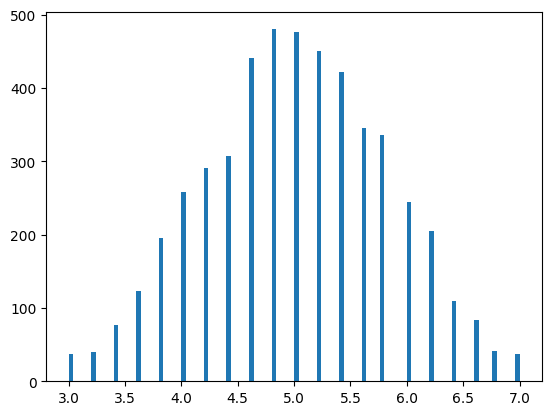

In [ ]:
# 모집단 갯수 range(1,100000)
# 표본의 크기 100개
# 샘플링 5000번 시행
# 평균의 위치, 분산 모양 파악
# 표본의 크기가 크면 N(모평균, 모분산/n)
# 표본이 크기 n이 커질수록 편차가 줄어들고, 정규분포에 가까워진다.

import matplotlib.pyplot as plt
import numpy as np
import random

avg_values = []
for i in range(1, 5000):
    samples = random.sample(range(1, 10), 5) # sample 10만개중 랜덤 100개
                                             # 샘플의 크기가 커질수록 더 넓게 분포
    x = np.mean(samples)
    avg_values.append(x)

plt.hist(avg_values, bins = 100)
plt.show()


##2.t 검정
- 집단 간 평균 차이 검정


### 2-1 One Sample t-test(단일표본 t검정)
- 표본이 하나일 때, 모집단의 평균과 표본집단의 평균 사이에 차이가 있는지를 검증하는 방법
- scipy.stats 의 ttest_1samp(a, popman) 이용

In [ ]:
# bus_wait_time.csv

import pandas as pd

df = pd.read_csv('/content/bus_wait_time.csv')
df

,waittime
0,14.685862
1,14.099321
2,15.074540
3,14.063753
4,15.004121
...,...
93541,14.596845
93542,15.267857
93543,14.870376
93544,15.719782


In [ ]:
# 평균
df['waittime'].mean()

15.00011123283454

In [ ]:
# 가설 설정
# h0 : 뮤 = 15min이다.
# h1 : 뮤는 15min이 아니다

from scipy import stats

# ttest_1samp(sample observation, 귀무가설의 기대값)
stats.ttest_1samp(df['waittime'], popmean=15)

# statistic : 검정 통계량, pvalue , df : 자유도
# 유의수준 알파값을 0.05로 했을 때 p-value = 0.95 즉, 0.95 > 0.05이므로 -> 귀무가설 채택
# 따라서 버스의 waittime은 15min이다. 

TtestResult(statistic=0.058841382013004526, pvalue=0.9530785731500322, df=93545)

### [실습]
한 자동차 회사에서 새로 생산된 자동차의 연비가 리터당 20Km라고 한다.
이 회사의 주장이 정당한지 확인하기 위해 자동차 20대를 임의로 선택하여 조사해 본 결과가 아래와 같다. 자동차 회사의 주장이 옳은가. 아니면 이 자종의 주행거리가 20Km보다 작다고 할 수 있는가.



In [ ]:
# car_fuel.csv
# 단측검정일때는 양측검정의 p-value/2를 해줘야 함 (작을까? : 단측검정)

import pandas as pd

df = pd.read_csv('/content/car_fuel.csv')
df

,ID,Y
0,1,19.0
1,2,20.7
2,3,15.1
3,4,20.6
4,5,18.5
5,6,21.4
6,7,19.3
7,8,17.6
8,9,19.7
9,10,20.6


In [ ]:
# 평균
df['Y'].mean()


19.229999999999997

In [ ]:
# 가설 설정
# h0 : 뮤는 20km이다.
# h2 : 뮤는 20km가 아니다.

from scipy import stats

t_statistic, p_value = stats.ttest_1samp(df['Y'], popmean=20)
# 단측 검정
p_value = p_value/2
alpha = 0.05
print(f"statistic:{t_statistic}, p_value:{p_value}")
# p-value값이 0.03 이므로 0.03 < 0.05
# 따라서 대립가설 채택
# 연비는 20km가 아니다.
if p_value < alpha:
    print("귀무가설을 기각")
else:
    print("귀무가설을 채택")

statistic:-2.322137388820601, p_value:0.015744314039004715
귀무가설을 기각


In [ ]:
stat, p_value = stats.ttest_1samp(df['Y'], popmean=20, alternative='less')
print('p_value ==> ', p_value)

p_value ==>  0.015744314039004715


### 2-2 Two Sample t-test(독립표본 t검정)
- 서로 다른 두 개의 그룹 간 평균 검정을 위한 방법
- scipy.stats 의 ttest_ind(x, y) 함수 이용


- '새로운 강의 방식이 학생들의 독해력 향상에 도움을 주는가?'
- 새로운 강의 방식에 의한 평균이 기존의 강의방식에 의한 평균보다 큰지 검정
- 16명의 학생들을 8명씩 랜덤 추출하여 두집단으로 나눔
- 한 집단에는 기존 방식(old), 한 집단에는 새로운 방식(new)

### H0 : u1 = u2 , H1: u1 > u2 

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Reading.csv')
df

,ID,Group,Score
0,1,New,75
1,2,New,80
2,3,New,72
3,4,New,77
4,5,New,69
5,6,New,81
6,7,New,71
7,8,New,78
8,9,Old,65
9,10,Old,70


<Axes: xlabel='Group', ylabel='Score'>

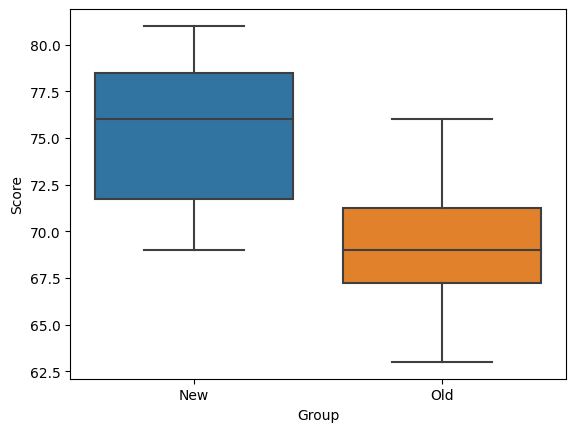

In [ ]:
# 등분산이 같아야 함
# boxplot
import seaborn as sns
sns.boxplot(x='Group', y='Score', data=df)

<Axes: xlabel='Group', ylabel='Score'>

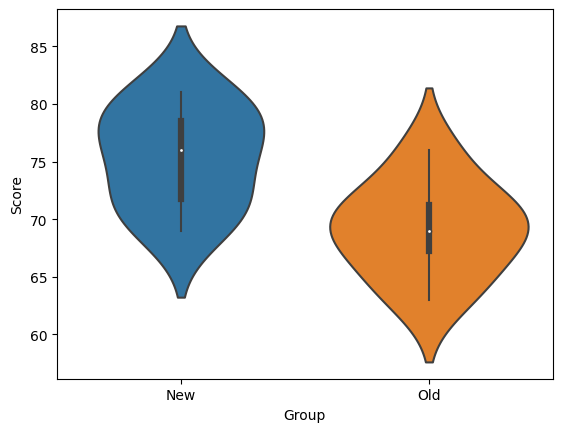

In [ ]:
# violinplot
sns.violinplot(x='Group', y='Score', data=df)

In [ ]:
# describe()
df.groupby('Group').describe()['Score']

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
New,8.0,75.375,4.373214,69.0,71.75,76.0,78.50,81.0
Old,8.0,69.125,4.086126,63.0,67.25,69.0,71.25,76.0


In [ ]:
# 집단 나누기 
new = df[df['Group'] == 'New']
old = df[df['Group'] == 'Old']
new.shape, old.shape

((8, 3), (8, 3))

In [ ]:
# 양측검정
# stats.ttest_ind

stat, pvalue = stats.ttest_ind(new.Score, old.Score)
print('pvalue ==> ', pvalue/2)

pvalue ==>  0.005235372094016561


In [ ]:
# 결과해석
# H0 : New와 old의 평균은 같다
# H1 : New의 평균이 더 크다
# 유의수준 0.05하에서 p-value가 0.005로 유의수준보다 작으므로 귀무가설 기각, 대립가설 채택
# 따라서 New가 old보다 score평균이 높다.

In [ ]:
stat, pvalue = stats.ttest_ind(new.Score, old.Score, alternative='greater')
print('pvalue ==> ', pvalue)

pvalue ==>  0.005235372094016561


### [실습] 

어떤 기업연구가는 신용등급이 FP(finantial performance)지표에 영향을 줄 것이라는 생각을 하고 있다. 이를 알아보기 위해 신용등급이 좋은 12개 회사와 나쁜 12개의 회사를 임의로 선택하여 FP지표를 조사하고 다음 데이터를 얻었다.
신용등급에 따른 FP지표의 모평균에 차이가 있는지를 유의수준 5%하에서 검정하시요
- 각각의 평균, 표준편차, t값, p-value, 해석

In [ ]:
# fp_goodbad.csv

In [137]:
df = pd.read_csv('/content/fp_goodbad.csv')
df

,ID,X,Y
0,1,Good,0.58
1,2,Good,2.80
2,3,Good,2.77
3,4,Good,3.50
4,5,Good,2.67
5,6,Good,2.97
6,7,Good,2.18
7,8,Good,3.24
8,9,Good,1.49
9,10,Good,2.19


In [138]:
good = df[df.X=='Good']
bad = df[df.X=='Bad ']
stats.ttest_ind(bad.Y, good.Y)

Ttest_indResult(statistic=-5.469733218713341, pvalue=1.702783686465887e-05)

In [139]:
df.groupby('X').describe()

ID                                                     Y            \
     count  mean       std   min    25%   50%    75%   max count      mean   
X                                                                            
Bad   12.0  18.5  3.605551  13.0  15.75  18.5  21.25  24.0  12.0  0.875000   
Good  12.0   6.5  3.605551   1.0   3.75   6.5   9.25  12.0  12.0  2.471667   

                                                   
           std   min     25%    50%     75%   max  
X                                                  
Bad   0.628657  0.07  0.4150  0.805  1.0975  2.28  
Good  0.792038  0.58  2.1875  2.685  2.8425  3.50

In [ ]:
# 결과해석
# H0 : 신용등급이 높은 기업과 낮은기업의 FP지표의 모평균 차이가 없다.
# H1 : 신용등급이 높은 기업과 낮은기업의 FP지표의 모평균 차이가 있다.
# p_value < 유의수준0.05 이므로 대립가설 채택
# 신용등급이 높은 기업과 낮은기업의 FP지표의 모평균 차이가 있다.

### 2-3 Paired t-test(대응표본 t검정)
- 연관된 두 집단의 차이 에 대한 단일 표본의 평균 검정을 진행하는 방법
- scipy.stats 의 ttest_rel(x, y) 
- 실험 단위를 동질적인 쌍으로 묶은 다음 각 쌍에 대해 랜덤하게 두 처리를 적용하고, 각 쌍에서 얻어진 반응 값의 차이를 이용하여 두 모평균 비교


대응표본 t- 검정사례
- '컴퓨터 교육 실시하기 전과 후의 성적 차이가 있는가?'
- 15명의 학생에게 통계학 시험 성적 전후 비교

In [97]:
# 'Paired.csv'
df = pd.read_csv('/content/Paired.csv')
df

,ID,Pretest,Posttest
0,1,80,82
1,2,73,71
2,3,70,95
3,4,60,69
4,5,88,100
5,6,84,71
6,7,65,75
7,8,37,60
8,9,91,95
9,10,98,99


<Axes: >

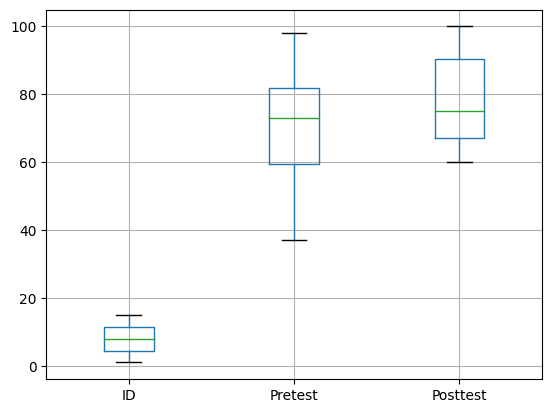

In [100]:
# boxplot
df.boxplot()

In [101]:
df.describe()

,ID,Pretest,Posttest
count,15.000000,15.000000,15.000000
mean,8.000000,70.266667,78.200000
std,4.472136,18.041487,14.313829
min,1.000000,37.000000,60.000000
25%,4.500000,59.500000,67.000000
50%,8.000000,73.000000,75.000000
75%,11.500000,82.000000,90.500000
max,15.000000,98.000000,100.000000


In [104]:
# diff의 통계값
df['Diff'] = df.Pretest - df.Posttest
df.describe()

,ID,Pretest,Posttest,Diff
count,15.000000,15.000000,15.000000,15.000000
mean,8.000000,70.266667,78.200000,-7.933333
std,4.472136,18.041487,14.313829,9.931671
min,1.000000,37.000000,60.000000,-25.000000
25%,4.500000,59.500000,67.000000,-12.500000
50%,8.000000,73.000000,75.000000,-7.000000
75%,11.500000,82.000000,90.500000,-2.500000
max,15.000000,98.000000,100.000000,13.000000


<Axes: xlabel='Diff', ylabel='Count'>

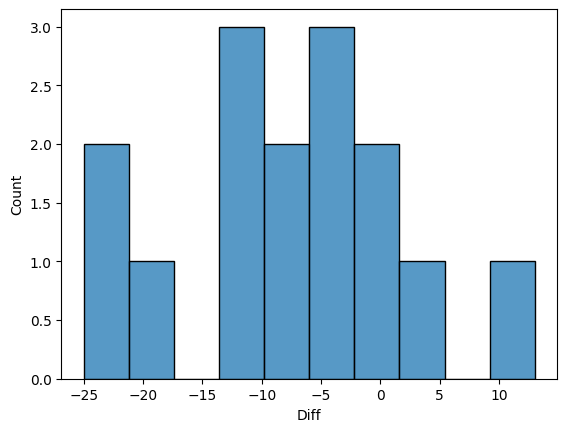

In [107]:
# diff의 분포 확인
sns.histplot(df.Diff, bins=10)

In [110]:
# stats.ttest_rel

stat, pvalue = stats.ttest_rel(df.Pretest, df.Posttest)    # 양측검정
#stats.ttest_rel(df.Pretest, df.Posttest. alternative=)    # 단측검정
print('pvalue==> ', pvalue/2)

pvalue==>  0.003965461614513267


In [ ]:
# h0 : pretest와 posttest가 차이가 없다. (diff=0)
# h1 : pretest가 posttest보다 작다.
# 유의수준 0.05하에서 pvalue가 0.0039로 0.05보다 작으므로 귀무가설을 기각
# 따라서 pretest가 작다고 할 수 있다.

### [실습]
사슴의 앞다리 와 뒷다리에 관한 데이터 

- Foreleg = [142,144,142,149,142,140,144,146,150,148]
- Hindleg = [138,147,143,143,136,136,139,141,145,146]

#### (a) 이 데이터에 대해서 연구자가 어떤 생각으로 표본을 생산하게 되었는지 서술하여라.

In [ ]:
# 앞다리와 뒷다리의 길이의 차이가 있을까?

#### (b) - a에서 서술한 내용에 대응되는 귀무가설과 대립가설을 제시하여라.



In [ ]:
# HO : 사슴의 앞다리와 뒷다리의 길이는 같다.
# H1 : 사슴의 앞다리와 뒷다리의 길이에 차이가 있다.

#### (c) - (b)의 통계적 가설에 대해 생각할 수 있는 두 가지 유형의 오류의 내용을 구체적으로 설명하여라.


In [ ]:
# 제 1종 오류
# 귀무가설(H0)가 참 일때, 귀무가설을 기각하는 오류
# 즉, 사슴의 앞다리와 뒷다리의 길이가 실제로 같지만 검정 결과를 바탕으로 두 길이의 차이가 있다고 결론 내린경우

# 제 2종 오류
# 대립가설(H1)이 참 일때, 귀무가설을 기각하지 않는 오류
# 즉, 사슴의 앞다리와 뒷다리의 길이에 차이가 있지만, 검정 결과를 바탕으로 두 길이의 차이가 없다고 결론 내린 경우

#### (d) - 다리길이의 차이를 계산하여라 (diff)


In [113]:
Foreleg = [142,144,142,149,142,140,144,146,150,148]
Hindleg = [138,147,143,143,136,136,139,141,145,146]

diff = [f-h for f, h in zip(Foreleg, Hindleg)]
diff

[4, -3, -1, 6, 6, 4, 5, 5, 5, 2]

In [126]:
df = pd.DataFrame({'Foreleg':Foreleg,
                   'Hindleg':Hindleg})

df['diff'] = df['Foreleg'] - df['Hindleg']
df

,Foreleg,Hindleg,diff
0,142,138,4
1,144,147,-3
2,142,143,-1
3,149,143,6
4,142,136,6
5,140,136,4
6,144,139,5
7,146,141,5
8,150,145,5
9,148,146,2


In [127]:
# pandas 자체 데이터 뺄셈
df.diff(axis=0)

,Foreleg,Hindleg,diff
0,NaN,NaN,NaN
1,2.0,9.0,-7.0
2,-2.0,-4.0,2.0
3,7.0,0.0,7.0
4,-7.0,-7.0,0.0
5,-2.0,0.0,-2.0
6,4.0,3.0,1.0
7,2.0,2.0,0.0
8,4.0,4.0,0.0
9,-2.0,1.0,-3.0


In [128]:
# Hindleg - Foreleg
df.diff(axis=1)

,Foreleg,Hindleg,diff
0,NaN,-4,-134
1,NaN,3,-150
2,NaN,1,-144
3,NaN,-6,-137
4,NaN,-6,-130
5,NaN,-4,-132
6,NaN,-5,-134
7,NaN,-5,-136
8,NaN,-5,-140
9,NaN,-2,-144


#### (e) - 변수 diff에 대한 기술통계량을 출력하고 그 결과에 기초하여 이 데이터의 전반적인 내용을 요약하여라.

In [115]:
diff_series = pd.Series(diff)

desc_stats = diff_series.describe()
desc_stats

count    10.000000
mean      3.300000
std       3.056868
min      -3.000000
25%       2.500000
50%       4.500000
75%       5.000000
max       6.000000
dtype: float64

In [ ]:
# 평균차이 3.3, 표준편차 3.05, 중위수 4.5, 가장 큰 차이 6

#### (f) boxplot을 이용하여 변수 diff 분포의 형태를 묘사하여라


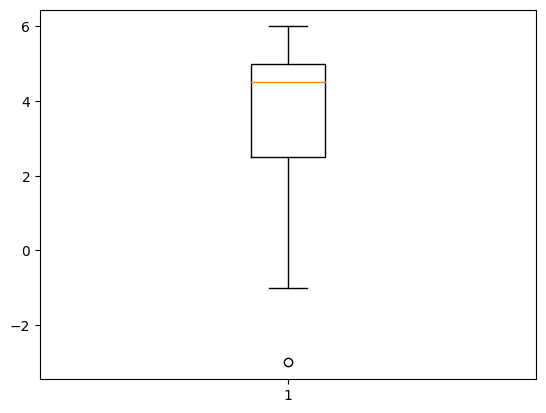

In [124]:
plt.boxplot(diff);

#### (g) - (b)에 규정된 관심대상의 가설을 검정하고, 그 결과를 서술하여라.

In [121]:
stat, p_value = stats.ttest_rel(Foreleg, Hindleg)
print('p_value ==>', p_value)

p_value ==> 0.007703223347263766


In [122]:
# p_value < 유의수준 0.05이므로 귀무가설 기각, 대립가설 채택
# H1 : 사슴의 앞다리와 뒷다리의 길이에 차이가 있다.

## 3.카이제곱 독립성 검정
- 서로 연관성이 있는가? (독립적인가?)
- scipy.stats 의 chi2_contingency() 함수 이용


- 2차원 교차표(분할표) 작성 - Prefer 데이터 

In [ ]:
# 귀무가설(H0) : Agegroup과 product는 독립이다. ( E = O )
# 대립가설(H1) : Agegroup과 product는 독립이 아니다. 연관성이 있다. (E != O)

In [131]:
# Prefer.csv

df = pd.read_csv('/content/Prefer.csv')
df

,ID,Agegroup,Product
0,1,30<,B
1,2,30>=,B
2,3,30<,B
3,4,30<,A
4,5,30>=,B
...,...,...,...
295,296,30<,C
296,297,30<,C
297,298,30>=,A
298,299,30>=,C


In [134]:
# pd.crosstab, pd.pivot_table
pd.crosstab(index=df['Agegroup'], columns=df['Product'], margins=True)

Product,A,B,C,All
Agegroup,,,,
30<,20,20,60,100
30>=,70,100,30,200
All,90,120,90,300


In [135]:
tab = pd.crosstab(index=df['Agegroup'], columns=df['Product'])
print(tab)

Product    A    B   C
Agegroup             
30<       20   20  60
30>=      70  100  30


In [136]:
stats.chi2_contingency(tab)

Chi2ContingencyResult(statistic=65.0, pvalue=7.681204685202098e-15, dof=2, expected_freq=array([[30., 40., 30.],
       [60., 80., 60.]]))

In [ ]:
# p-value가 0이므로 귀무가설 기각
# 두 변수는 연관이 있다.

### [실습] 
학업성적과 학생의 성별이 어떤 관계가 있는지 알아보기 위하여 대학생 200명을 무작위 추출하여 조사한 결과 다음과 같은 데이터를 얻었다. 학업성적과 학생의 성별이 어떤 관계가 있는지 유의수준 5%하에서 검정하여라

In [ ]:
# student_score.csv

##4.상관 분석

-피어슨 상관계수 계산 

-from scipy import stats

-stats.pearsonr

In [ ]:
# Student.csv


### [실습] 
다음의 데이터는 어떤 약품의 투여량과 투여된 실험대상이 청각신호에 반응하는데 걸리는 시간(초)을 기록한 데이터이다.
- 투여량 :    1,3,4,7,9,12,13,14
- 반응시간 : 3.5,2.4,2.1,1.3,1.2,2.2,2.6,4.2

(a) 상관계수 r을 계산하여라

(b) 산점도를 그리고, r이 두 변수 사이의 관계에 대한 적절한 척도인지 논의하여라




### [실습]

이 데이터는 저콜레스테롤 식단의 효과를 분석하기 위하여 임의로 추출된 15명의 지원자들에게 4주간 이 식단을 제공한 후 그들의 콜레스테롤 감소량과 나이를 기록록한 데이터이다. 

(a) 이 데이터를 이용하여 산점도와 표본상관계수 r을 구하여라. 귀무가설에 대한 검정결과를 서술하라.

(b) 이 데이터에서 27세에서 37세 사이의 5명을 제외한 나머지 10명의 데이터를 이용하여 산점도와 표본상관계수 r을 구하여라

(c) (a)와 (b)에서 각각 구한 표본상관계수를 비교하여 설명하여라


In [ ]:
# age_col.csv
